In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
file_path = 'FlowLog\MCFP特徵集.csv' #綜合 CTU MCFP
data = pd.read_csv(file_path)

In [3]:
data["label"].value_counts(normalize=True)

1    0.513031
0    0.486969
Name: label, dtype: float64

In [4]:
# 分離特徵（X）與標籤（y）
X = data.drop(columns=['label'])
y = data['label']

In [5]:
# 使用 LabelEncoder 對類別特徵進行編碼
label_encoder = LabelEncoder()
X['version'] = label_encoder.fit_transform(X['version'])
X['cipher'] = label_encoder.fit_transform(X['cipher'])
X['curve'] = label_encoder.fit_transform(X['curve'])
X['certificate'] = label_encoder.fit_transform(X['certificate'])

In [6]:
# 將特徵數據進行標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# 將數據分成訓練和測試集 (70% 訓練, 30% 測試)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [8]:
# 使用 K-fold 交叉驗證
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [9]:
# 訓練 Random Forest 模型
rf_model = RandomForestClassifier(n_estimators=5, random_state=42)
y_pred = cross_val_predict(rf_model, X_train, y_train, cv=kf)
acc_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='accuracy')
pre_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='precision')
rec_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='recall')
f1_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='f1')

In [38]:
print("Accuracy:", np.mean(acc_scores))
print("Precision:", np.mean(pre_scores))
print("Recall:", np.mean(rec_scores))
print("F1-score:", np.mean(f1_scores))

Accuracy: 0.9998990429267828
Precision: 0.9999209477243003
Recall: 0.999881265682186
F1-score: 0.999901100854381


In [10]:
# 訓練最終模型
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

In [11]:
# 預測測試集
y_pred = rf_model.predict(X_test)

In [15]:
# 計算 accuracy, precision, recall 和 f1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [16]:
# 顯示這些評估指標
test_results = {
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1-Score': [f1]
}

results_df = pd.DataFrame(test_results)
results_df

,Accuracy,Precision,Recall,F1-Score
0,0.994166,0.995987,0.993071,0.994527


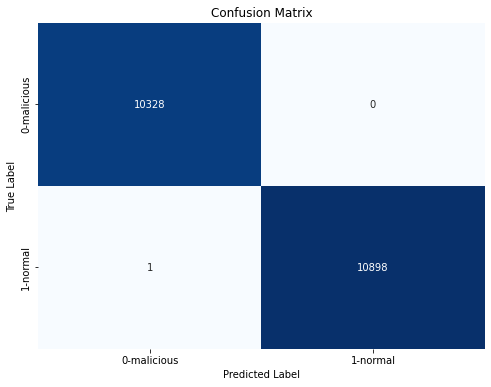

In [12]:
# 繪製 confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['0-malicious', '1-normal'], yticklabels=['0-malicious', '1-normal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()